# Simulación del Juego Serpientes y Escaleras

Implementacion de una simulación del juego **Serpientes y Escaleras** utilizando cadenas de Markov para analizar las probabilidades de transición entre casillas y calcular el número esperado de pasos para completar el juego.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Construcción de la Matriz de Transición

La matriz de transición P representa las probabilidades de moverse de una casilla a otra. Cada fila corresponde a una casilla del tablero (0-100) y modela las 6 posibles salidas al lanzar un dado, considerando las serpientes y escaleras.

In [116]:
# Inicializar matriz de transición (101 estados: casillas 0-100)
P = np.zeros((101, 101))

def r(row, inp):
    """
    Asigna probabilidades de transición para una casilla.
    
    Args:
        row: casilla actual
        inp: lista de 6 casillas destino (resultados del dado 1-6)
    """
    for i in range(6):
        P[row, inp[i]] += 1/6

# Definir transiciones para cada casilla (incluye efectos de serpientes y escaleras)
r(0, [38, 2, 3, 14, 5, 6])      # Casilla 1 -> escalera a 38
r(1, [2, 3, 14, 5, 6, 7])
r(2, [3, 14, 5, 6, 7, 8])       # Casilla 4 -> escalera a 14
r(3, [14, 5, 6, 7, 8, 31])      # Casilla 9 -> escalera a 31
r(4, [5, 6, 7, 8, 31, 10])
r(5, [6, 7, 8, 31, 10, 11])
r(6, [7, 8, 31, 10, 11, 12])
r(7, [8, 31, 10, 11, 12, 13])
r(8, [31, 10, 11, 12, 13, 14])
r(9, [10, 11, 12, 13, 14, 15])
r(10, [11, 12, 13, 14, 15, 6])  # Casilla 16 -> serpiente a 6
r(11, [12, 13, 14, 15, 6, 17])
r(12, [13, 14, 15, 6, 17, 18])
r(13, [14, 15, 6, 17, 18, 19])
r(14, [15, 6, 17, 18, 19, 20])
r(15, [6, 17, 18, 19, 20, 42])  # Casilla 21 -> escalera a 42
r(16, [17, 18, 19, 20, 42, 22])
r(17, [18, 19, 20, 42, 22, 23])
r(18, [19, 20, 42, 22, 23, 24])
r(19, [20, 42, 22, 23, 24, 25])
r(20, [42, 22, 23, 24, 25, 26])
r(21, [22, 23, 24, 25, 26, 27])
r(22, [23, 24, 25, 26, 27, 84]) # Casilla 28 -> escalera a 84
r(23, [24, 25, 26, 27, 84, 29])
r(24, [25, 26, 27, 84, 29, 30])
r(25, [26, 27, 84, 29, 30, 31])
r(26, [27, 84, 29, 30, 31, 32])
r(27, [84, 29, 30, 31, 32, 33])
r(28, [29, 30, 31, 32, 33, 34])
r(29, [30, 31, 32, 33, 34, 35])
r(30, [31, 32, 33, 34, 35, 44]) # Casilla 36 -> escalera a 44
r(31, [32, 33, 34, 35, 44, 37])
r(32, [33, 34, 35, 44, 37, 38])
r(33, [34, 35, 44, 37, 38, 39])
r(34, [35, 44, 37, 38, 39, 40])
r(35, [44, 37, 38, 39, 40, 41])
r(36, [37, 38, 39, 40, 41, 42])
r(37, [38, 39, 40, 41, 42, 43])
r(38, [39, 40, 41, 42, 43, 44])
r(39, [40, 41, 42, 43, 44, 45])
r(40, [41, 42, 43, 44, 45, 46])
r(41, [42, 43, 44, 45, 46, 47])
r(42, [43, 44, 45, 46, 47, 26]) # Casilla 48 -> serpiente a 26
r(43, [44, 45, 46, 47, 26, 11]) # Casilla 49 -> serpiente a 11
r(44, [45, 46, 47, 26, 11, 50])
r(45, [46, 47, 26, 11, 50, 67]) # Casilla 51 -> escalera a 67
r(46, [47, 26, 11, 50, 67, 52])
r(47, [26, 11, 50, 67, 52, 53])
r(48, [11, 50, 67, 52, 53, 54])
r(49, [50, 67, 52, 53, 54, 55])
r(50, [67, 52, 53, 54, 55, 53]) # Casilla 56 -> serpiente a 53
r(51, [52, 53, 54, 55, 53, 57])
r(52, [53, 54, 55, 53, 57, 58])
r(53, [54, 55, 53, 57, 58, 59])
r(54, [55, 53, 57, 58, 59, 60])
r(55, [53, 57, 58, 59, 60, 61])
r(56, [57, 58, 59, 60, 61, 19]) # Casilla 62 -> serpiente a 19
r(57, [58, 59, 60, 61, 19, 63])
r(58, [59, 60, 61, 19, 63, 60]) # Casilla 64 -> serpiente a 60
r(59, [60, 61, 19, 63, 60, 65])
r(60, [61, 19, 63, 60, 65, 66])
r(61, [19, 63, 60, 65, 66, 67])
r(62, [63, 60, 65, 66, 67, 68])
r(63, [60, 65, 66, 67, 68, 69])
r(64, [65, 66, 67, 68, 69, 70])
r(65, [66, 67, 68, 69, 70, 91]) # Casilla 71 -> escalera a 91
r(66, [67, 68, 69, 70, 91, 72])
r(67, [68, 69, 70, 91, 72, 73])
r(68, [69, 70, 91, 72, 73, 74])
r(69, [70, 91, 72, 73, 74, 75])
r(70, [91, 72, 73, 74, 75, 76])
r(71, [72, 73, 74, 75, 76, 77])
r(72, [73, 74, 75, 76, 77, 78])
r(73, [74, 75, 76, 77, 78, 79])
r(74, [75, 76, 77, 78, 79, 100]) # Casilla 80 -> escalera a 100 (¡victoria!)
r(75, [76, 77, 78, 79, 100, 81])
r(76, [77, 78, 79, 100, 81, 82])
r(77, [78, 79, 100, 81, 82, 83])
r(78, [79, 100, 81, 82, 83, 84])
r(79, [100, 81, 82, 83, 84, 85])
r(80, [81, 82, 83, 84, 85, 86])
r(81, [82, 83, 84, 85, 86, 24]) # Casilla 87 -> serpiente a 24
r(82, [83, 84, 85, 86, 24, 88])
r(83, [84, 85, 86, 24, 88, 89])
r(84, [85, 86, 24, 88, 89, 90])
r(85, [86, 24, 88, 89, 90, 91])
r(86, [24, 88, 89, 90, 91, 92])
r(87, [88, 89, 90, 91, 92, 73]) # Casilla 93 -> serpiente a 73
r(88, [89, 90, 91, 92, 73, 94])
r(89, [90, 91, 92, 73, 94, 75]) # Casilla 95 -> serpiente a 75
r(90, [91, 92, 73, 94, 75, 96])
r(91, [92, 73, 94, 75, 96, 97])
r(92, [73, 94, 75, 96, 97, 78]) # Casilla 98 -> serpiente a 78
r(93, [94, 75, 96, 97, 78, 99])
r(94, [75, 96, 97, 78, 99, 100])
r(95, [96, 97, 78, 99, 100, 95]) # Casilla 101 desborda, regresa a 95
r(96, [97, 78, 99, 100, 96, 96])
r(97, [78, 99, 100, 97, 97, 97])
r(98, [99, 100, 98, 98, 98, 98])
r(99, [100, 99, 99, 99, 99, 99])
r(100, [100, 100, 100, 100, 100, 100]) # Estado absorbente (fin del juego)

print("Matriz de transición construida")

Matriz de transición construida


## 2. Visualización de la Matriz de Transición

Visualizamos la Matriz de Transición de la cadena de Markov del juego de serpientes y escaleras mediante el siguiente mapa de calor.

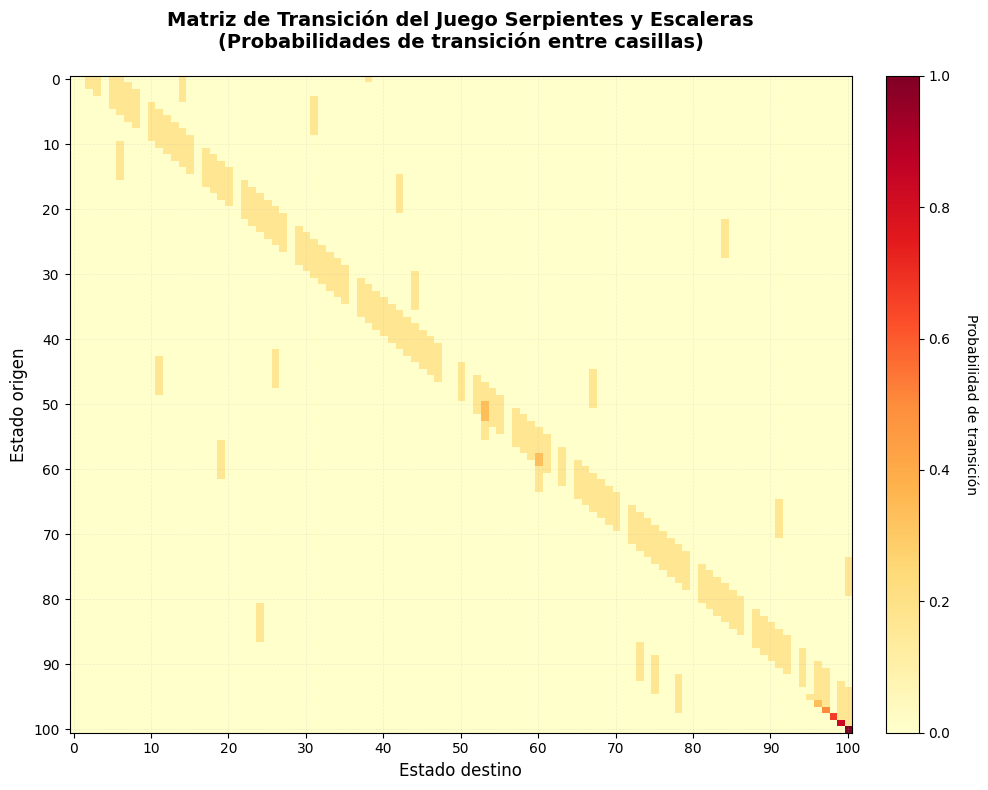

In [117]:
# Visualizar la matriz de transición completa como mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))

# Crear mapa de calor de la matriz de transición
im = ax.imshow(P, cmap='YlOrRd', aspect='auto', interpolation='nearest')

# Configurar ejes
ax.set_xlabel('Estado destino', fontsize=12)
ax.set_ylabel('Estado origen', fontsize=12)
ax.set_title('Matriz de Transición del Juego Serpientes y Escaleras\n(Probabilidades de transición entre casillas)', 
             fontsize=14, fontweight='bold', pad=20)

# Agregar colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Probabilidad de transición', rotation=270, labelpad=20)

# Marcar cada 10 casillas para mejor legibilidad
tick_positions = list(range(0, 101, 10))
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)

# Agregar líneas de cuadrícula sutiles
ax.grid(True, which='major', alpha=0.2, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# 3. Simulación de Tiradas

Realizamos un análisis de N tiradas para obtener el número medio de tiradas que son necesarias para ganar el juego.

In [118]:
def jugar_juego_completo():
    """
    Simula un juego completo de Serpientes y Escaleras desde el inicio (casilla 0)
    hasta alcanzar la victoria (casilla 100).
    
    Returns:
        Número de tiradas necesarias para ganar el juego
    """
    casilla_actual = 0
    tiradas = 0

    print(f"{casilla_actual} -> ", end="")
    while casilla_actual != 100:
        # Hacer una transición según la matriz de probabilidades
        casilla_actual = np.random.choice(range(101), p=P[casilla_actual])
        print(f"{casilla_actual} -> ", end="")
        tiradas += 1
    print()
    return tiradas

print(f"Completado en: {jugar_juego_completo()} tiradas")

0 -> 6 -> 11 -> 12 -> 14 -> 19 -> 22 -> 26 -> 84 -> 88 -> 94 -> 99 -> 99 -> 99 -> 99 -> 99 -> 99 -> 100 -> 
Completado en: 17 tiradas


In [119]:
def jugar_juego_completo():
    """
    Simula un juego completo de Serpientes y Escaleras desde el inicio (casilla 0)
    hasta alcanzar la victoria (casilla 100).
    
    Returns:
        Número de tiradas necesarias para ganar el juego
    """
    casilla_actual = 0
    tiradas = 0
    
    while casilla_actual != 100:
        # Hacer una transición según la matriz de probabilidades
        casilla_actual = np.random.choice(range(101), p=P[casilla_actual])
        tiradas += 1
    
    return tiradas

# Parámetro configurable: número de juegos a simular
N_JUEGOS = 10000

print(f"Simulando {N_JUEGOS} juegos completos...")
print("Esto puede tomar unos segundos...\n")

# Realizar N simulaciones y guardar el número de tiradas de cada juego
tiradas_por_juego = []
for i in range(N_JUEGOS):
    tiradas = jugar_juego_completo()
    tiradas_por_juego.append(tiradas)
    
    # Mostrar progreso cada 1000 juegos
    if (i + 1) % 1000 == 0:
        print(f"  Juegos completados: {i + 1}/{N_JUEGOS}")

# Convertir a array para análisis
tiradas_por_juego = np.array(tiradas_por_juego)

# Calcular estadísticas
media_tiradas = np.mean(tiradas_por_juego)
mediana_tiradas = np.median(tiradas_por_juego)
desv_std = np.std(tiradas_por_juego)
minimo = np.min(tiradas_por_juego)
maximo = np.max(tiradas_por_juego)

print(f"\n{'='*60}")
print(f"RESULTADOS DE {N_JUEGOS} SIMULACIONES")
print(f"{'='*60}")
print(f"\nEstadísticas del número de tiradas para ganar:")
print(f"   • Media:              {media_tiradas:.2f} tiradas")
print(f"   • Mediana:            {mediana_tiradas:.0f} tiradas")
print(f"   • Desviación estándar: {desv_std:.2f} tiradas")
print(f"   • Mínimo:             {minimo} tiradas")
print(f"   • Máximo:             {maximo} tiradas")
print(f"\nPercentiles:")
print(f"   • 25% de los juegos terminan en ≤ {np.percentile(tiradas_por_juego, 25):.0f} tiradas")
print(f"   • 50% de los juegos terminan en ≤ {np.percentile(tiradas_por_juego, 50):.0f} tiradas")
print(f"   • 75% de los juegos terminan en ≤ {np.percentile(tiradas_por_juego, 75):.0f} tiradas")
print(f"   • 95% de los juegos terminan en ≤ {np.percentile(tiradas_por_juego, 95):.0f} tiradas")

Simulando 10000 juegos completos...
Esto puede tomar unos segundos...

  Juegos completados: 1000/10000
  Juegos completados: 1000/10000
  Juegos completados: 2000/10000
  Juegos completados: 2000/10000
  Juegos completados: 3000/10000
  Juegos completados: 3000/10000
  Juegos completados: 4000/10000
  Juegos completados: 4000/10000
  Juegos completados: 5000/10000
  Juegos completados: 5000/10000
  Juegos completados: 6000/10000
  Juegos completados: 6000/10000
  Juegos completados: 7000/10000
  Juegos completados: 7000/10000
  Juegos completados: 8000/10000
  Juegos completados: 8000/10000
  Juegos completados: 9000/10000
  Juegos completados: 9000/10000
  Juegos completados: 10000/10000

RESULTADOS DE 10000 SIMULACIONES

Estadísticas del número de tiradas para ganar:
   • Media:              39.42 tiradas
   • Mediana:            33 tiradas
   • Desviación estándar: 25.19 tiradas
   • Mínimo:             7 tiradas
   • Máximo:             244 tiradas

Percentiles:
   • 25% de los ju

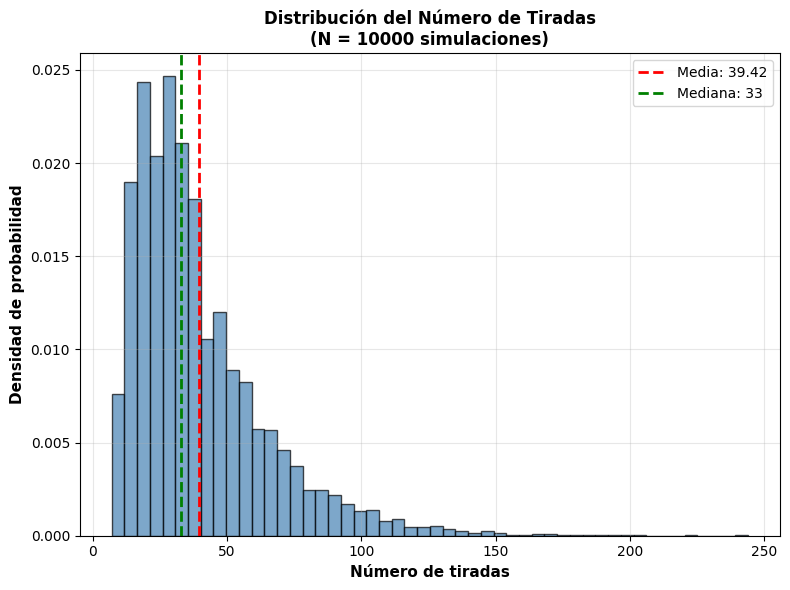

In [120]:
# Crear figura con múltiples gráficas
fig, axes = plt.subplots(1,1, figsize=(8, 6))

# Gráfica 1: Histograma de la distribución
ax1 = axes
n, bins, patches = ax1.hist(tiradas_por_juego, bins=50, color='steelblue', 
                             edgecolor='black', alpha=0.7, density=True)
ax1.axvline(media_tiradas, color='red', linestyle='--', linewidth=2, 
            label=f'Media: {media_tiradas:.2f}')
ax1.axvline(mediana_tiradas, color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {mediana_tiradas:.0f}')
ax1.set_xlabel('Número de tiradas', fontsize=11, fontweight='bold')
ax1.set_ylabel('Densidad de probabilidad', fontsize=11, fontweight='bold')
ax1.set_title(f'Distribución del Número de Tiradas\n(N = {N_JUEGOS} simulaciones)', 
              fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()